In [1]:
import ipympl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

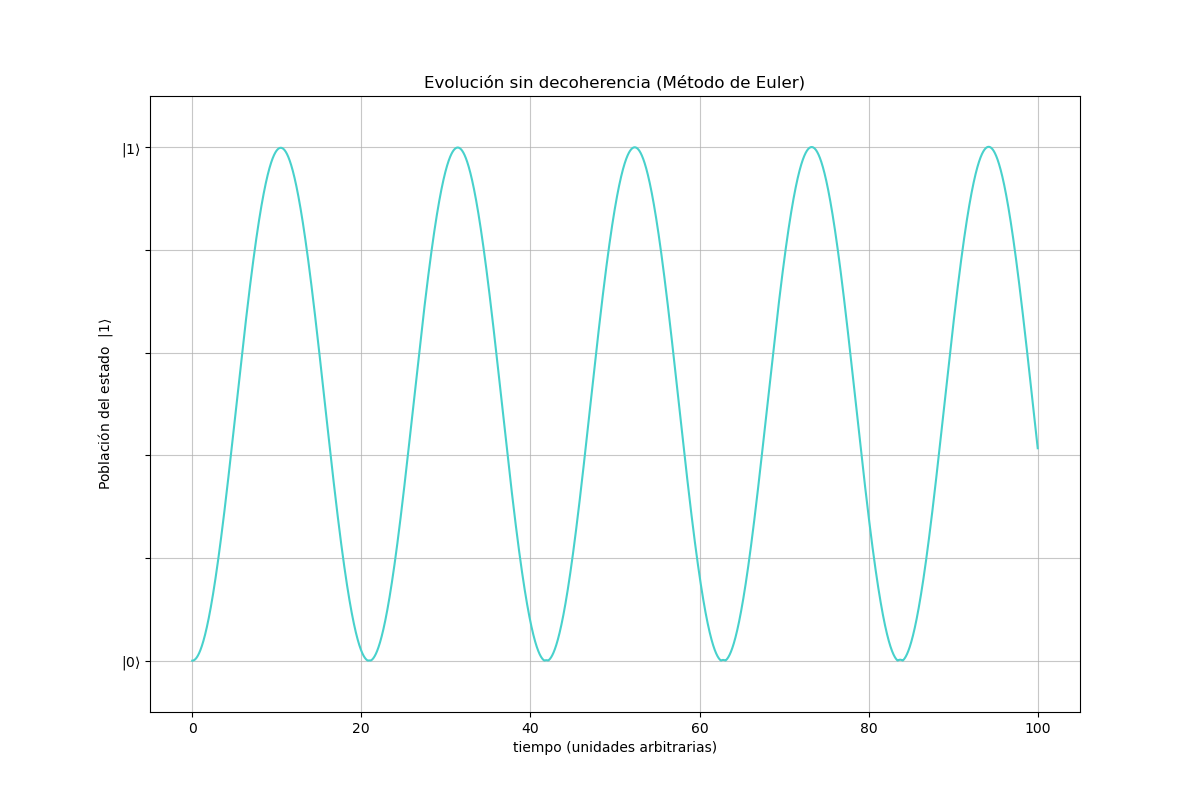

In [7]:
# definimos los operadores de Pauli
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_plus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_minus = np.array([[0, 1], [0, 0]], dtype=complex)

# definimos los parámetros del sistema
# (se han definido estos valores de los parámetros para que la gráfica salga igual que a Jorge)
hbar = 1
Delta_q = 0.1  # desplazamiento de frecuencia
Omega = 3  # frecuencia de Rabi

# definimos el hamiltoniano sin decoherencia
H = (hbar * Delta_q / 2) * sigma_z + (hbar * Omega / 2) * (sigma_plus + sigma_minus)

# definimos rho inicial
rho_initial = np.array([[1, 0], [0, 0]], dtype=complex)

# tiempos de integración
t_points = 100000
t_max = 10
t = np.linspace(0, t_max, t_points)
dt = t[1] - t[0]

# hacemos la evolución de la ecuación de Lindblad (sin términos de Lindblad ya que no hay decoherencia)
rho_t = np.zeros((t_points, 2, 2), dtype=complex)
rho_t[0] = rho_initial

for i in range(1, t_points):
    # derivada de rho
    drho_dt = -1j / hbar * (np.dot(H, rho_t[i - 1]) - np.dot(rho_t[i - 1], H))

    # método de Euler para rho
    rho_t[i] = rho_t[i - 1] + drho_dt * dt

# calculamos la probabilidad de ocupación del estado excitado en función del tiempo
excited_state_population = np.abs(rho_t[:, 1, 1])

# grafica
plt.figure(figsize=(12, 8))
plt.yticks(np.linspace(0, 1, 6), [r'$|0\rangle$', '', '', '', '', r'$|1\rangle$'])
plt.xticks(np.linspace(0, 10, 6), ['0', '20', '40', '60', '80', '100'])
plt.plot(t, excited_state_population, color='mediumturquoise')
plt.xlabel('tiempo (unidades arbitrarias)')
plt.ylabel(r'Población del estado  $|1\rangle$')
plt.title('Evolución sin decoherencia (Método de Euler)')
plt.grid(True, alpha=0.7)
plt.ylim(-0.1, 1.1)
plt.show()

Método Runge Kutta

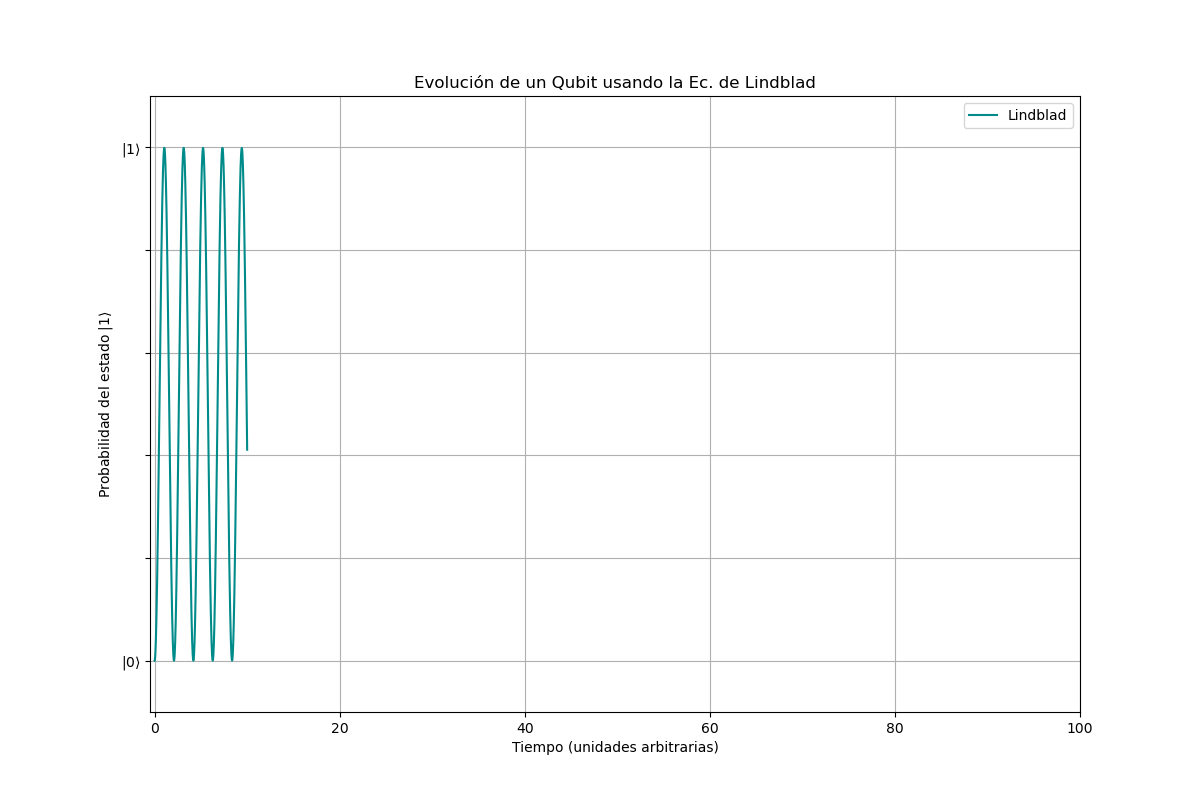

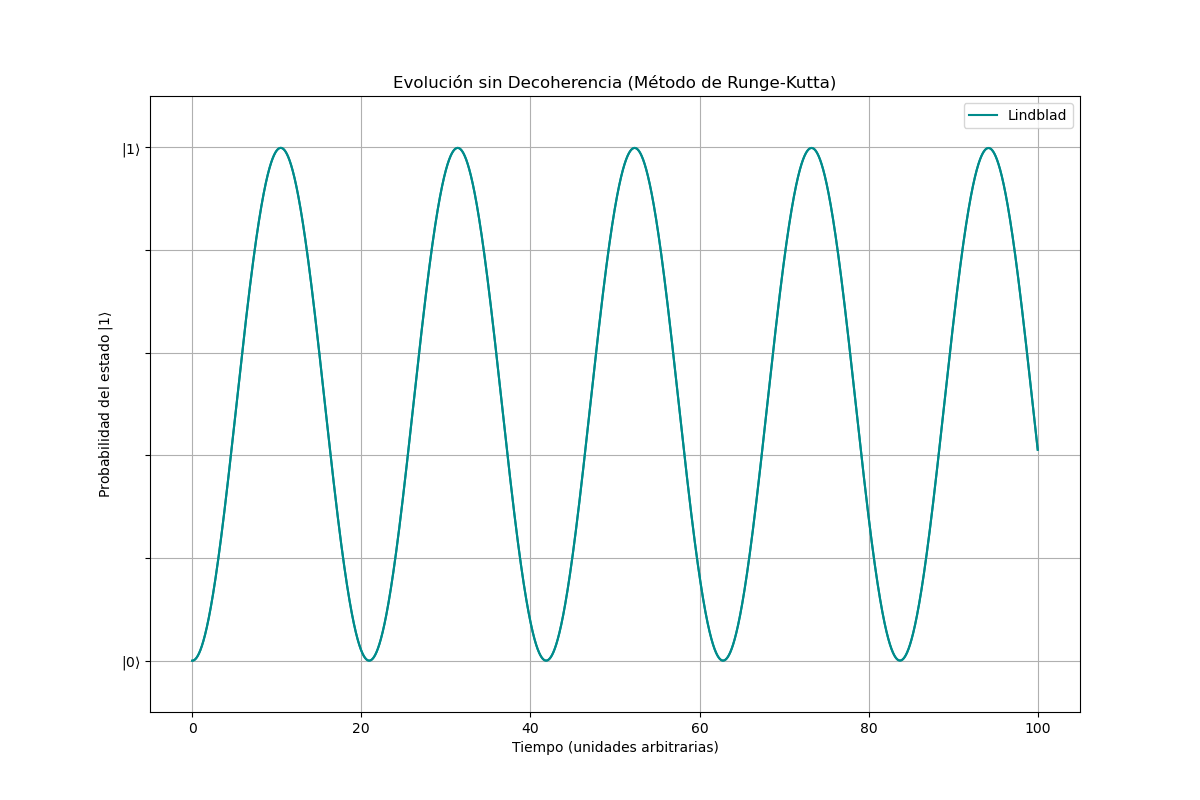

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir los operadores de Pauli
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_plus = np.array([[0, 0], [1, 0]], dtype=complex)
sigma_minus = np.array([[0, 1], [0, 0]], dtype=complex)

# Parámetros del sistema
hbar = 1  # Puede ser 1 en unidades naturales
Delta_q = 0.1
Omega = 3

# Definir el Hamiltoniano
H = (hbar * Delta_q / 2) * sigma_z + (hbar * Omega / 2) * (sigma_plus + sigma_minus)

# Estado inicial en forma de matriz densidad (estado puro |0>)
rho_initial = np.array([[1, 0], [0, 0]], dtype=complex)

# Definir el conmutador
def commutator(A, B):
    return np.dot(A, B) - np.dot(B, A)

# Definir la ecuación de von Neumann
def von_neumann(t, rho_flat):
    # Reconstruir la matriz densidad desde la forma aplanada
    rho = rho_flat.reshape((2, 2))
    # Calcular la derivada de rho
    drho_dt = -1j / hbar * commutator(H, rho)
    # Devolver la matriz densidad aplanada
    return drho_dt.flatten()

# Tiempo de simulación
t_points = 100000
t_max = 10
t = np.linspace(0, t_max, t_points)
dt = t[1] - t[0]


# Resolver la ecuación diferencial
sol = solve_ivp(von_neumann, [0, t_max], rho_initial.flatten(), t_eval=t)

# Reconstruir la matriz densidad desde la solución aplanada
rho_t = sol.y.T.reshape(-1, 2, 2)

# Calcular la probabilidad de ocupación del estado excitado en función del tiempo
excited_state_population = np.abs(rho_t[:, 1, 1])

# Gráfica
plt.figure(figsize=(12, 8))

# Resultado de la ecuación de Lindblad
plt.plot(t, excited_state_population, label='Lindblad', color='darkcyan')

plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel('Probabilidad del estado $|1\\rangle$')
plt.yticks(np.linspace(0, 1, 6), [r'$|0\rangle$', '', '', '', '', r'$|1\rangle$'])
plt.xticks(np.linspace(0, 100, 6), ['0', '20', '40', '60', '80', '100'])

plt.ylim(-0.1, 1.1)

plt.title('Evolución de un Qubit usando la Ec. de Lindblad')
plt.legend()
plt.grid()
plt.show()
plt.plot(t, excited_state_population, color='darkcyan')
plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel(r'Probabilidad del estado $|1\rangle$')
plt.title('Evolución sin Decoherencia (Método de Runge-Kutta)')
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.yticks(np.linspace(0, 1, 6), [r'$|0\rangle$', '', '', '', '', r'$|1\rangle$'])
plt.xticks(np.linspace(0, 10, 6), ['0', '20', '40', '60', '80', '100'])
plt.show()